In [1]:
from utils.bert import *

In [35]:
seed = 42
torch.manual_seed(seed)

base_model_name = "all-mpnet-base-v2"  #"paraphrase-multilingual-mpnet-base-v2" 
import_path = "./Data/Preprocessed/data_with_filled_explanations_17.2.2022.pickle"
new_model_name = "./Data/Bert/fine-tuned-bert-{}".format(datetime.now().strftime('%Y-%m-%d-%H-%M-%S'))
min_sentence_tokens = 5
epochs_number = 5
batch_size = 40 # 30
top_n = 4

In [4]:
data = pd.read_pickle(import_path)
#data['explanation_prep'] = data['explanation_prep'].progress_apply(lambda x : preprocess_explanation(x))
train, dev_test = train_test_split(data, test_size = 0.2, random_state = 42)
dev, test = train_test_split(dev_test, test_size = 0.5, random_state = 42)

In [5]:
train = train     #[0:6000]

In [6]:
train = split_data_A(train, "explanation_prep")
dev = split_data_A(dev, "explanation_prep")
test = split_data_A(test, "explanation_prep")

  0%|          | 0/10312 [00:00<?, ?it/s]

Data splitted into list


  0%|          | 0/10312 [00:00<?, ?it/s]

Data splitted into rows


Batches:   0%|          | 0/745 [00:00<?, ?it/s]

Time for creating 372115 embedding vectors 2.91947656472524
Model used :all-mpnet-base-v2
Embeddings done


Batches:   0%|          | 0/745 [00:00<?, ?it/s]

Time for creating 372115 embedding vectors 8.988503257433573
Model used :all-mpnet-base-v2
Embeddings done
Columns added


  0%|          | 0/1289 [00:00<?, ?it/s]

Data splitted into list


  0%|          | 0/1289 [00:00<?, ?it/s]

Data splitted into rows


Batches:   0%|          | 0/94 [00:00<?, ?it/s]

Time for creating 46753 embedding vectors 0.4778632561365763
Model used :all-mpnet-base-v2
Embeddings done


Batches:   0%|          | 0/94 [00:00<?, ?it/s]

Time for creating 46753 embedding vectors 1.246708381175995
Model used :all-mpnet-base-v2
Embeddings done
Columns added


  0%|          | 0/1290 [00:00<?, ?it/s]

Data splitted into list


  0%|          | 0/1290 [00:00<?, ?it/s]

Data splitted into rows


Batches:   0%|          | 0/93 [00:00<?, ?it/s]

Time for creating 46368 embedding vectors 0.4835048000017802
Model used :all-mpnet-base-v2
Embeddings done


Batches:   0%|          | 0/93 [00:00<?, ?it/s]

Time for creating 46368 embedding vectors 1.2176953434944153
Model used :all-mpnet-base-v2
Embeddings done
Columns added


In [7]:
train[['source_text_sentences_count',"sentence_token_len"]].describe()

source_text_sentences_count  sentence_token_len
count                355204.000000       355204.000000
mean                     40.625356           22.346426
std                      14.194675           11.723729
min                       1.000000            6.000000
25%                      30.000000           14.000000
50%                      39.000000           20.000000
75%                      49.000000           28.000000
max                     133.000000          482.000000

In [8]:
train

index    id             reviewer                date  \
0        8991  8992  Jeffrey S. Solochek       July 22, 2013   
1        8991  8992  Jeffrey S. Solochek       July 22, 2013   
2        8991  8992  Jeffrey S. Solochek       July 22, 2013   
3        8991  8992  Jeffrey S. Solochek       July 22, 2013   
4        8991  8992  Jeffrey S. Solochek       July 22, 2013   
...       ...   ...                  ...                 ...   
372108   7314  7315       W. Gardner Sel  September 25, 2014   
372109   7314  7315       W. Gardner Sel  September 25, 2014   
372110   7314  7315       W. Gardner Sel  September 25, 2014   
372112   7314  7315       W. Gardner Sel  September 25, 2014   
372114   7314  7315       W. Gardner Sel  September 25, 2014   

                                                statement  \
0        New school testing standards will consume app...   
1        New school testing standards will consume app...   
2        New school testing standards will consume app...   
3        New school testing standards will consume app...   
4        New school testing standards will consume app...   
...                                                   ...   
372108   Austin has over 1,000 city employees that mak...   
372109   Austin has over 1,000 city employees that mak...   
372110   Austin has over 1,000 city employees that mak...   
372112   Austin has over 1,000 city employees that mak...   
372114   Austin has over 1,000 city employees that mak...   

                                              explanation  \
0        Florida is in the midst of implementing new, ...   
1        Florida is in the midst of implementing new, ...   
2        Florida is in the midst of implementing new, ...   
3        Florida is in the midst of implementing new, ...   
4        Florida is in the midst of implementing new, ...   
...                                                   ...   
372108   UPDATE 6:15 p.m., Sept. 26, 2014: We revised ...   
372109   UPDATE 6:15 p.m., Sept. 26, 2014: We revised ...   
372110   UPDATE 6:15 p.m., Sept. 26, 2014: We revised ...   
372112   UPDATE 6:15 p.m., Sept. 26, 2014: We revised ...   
372114   UPDATE 6:15 p.m., Sept. 26, 2014: We revised ...   

                                         shortExplanation truth_o_meter  \
0        In a letter to the state education commission...   mostly-true   
1        In a letter to the state education commission...   mostly-true   
2        In a letter to the state education commission...   mostly-true   
3        In a letter to the state education commission...   mostly-true   
4        In a letter to the state education commission...   mostly-true   
...                                                   ...           ...   
372108   Wiley said more than 1,000 city workers make ...   mostly-true   
372109   Wiley said more than 1,000 city workers make ...   mostly-true   
372110   Wiley said more than 1,000 city workers make ...   mostly-true   
372112   Wiley said more than 1,000 city workers make ...   mostly-true   
372114   Wiley said more than 1,000 city workers make ...   mostly-true   

                                                     tags  \
0                  [Education, Florida, Will Weatherford]   
1                  [Education, Florida, Will Weatherford]   
2                  [Education, Florida, Will Weatherford]   
3                  [Education, Florida, Will Weatherford]   
4                  [Education, Florida, Will Weatherford]   
...                                                   ...   
372108  [City Budget, City Government, Corrections and...   
372109  [City Budget, City Government, Corrections and...   
372110  [City Budget, City Government, Corrections and...   
372112  [City Budget, City Government, Corrections and...   
372114  [City Budget, City Government, Corrections and...   

                                                      url  ...  \
0       https://www.politifact.com/factchecks/2013/jul...  ...   
1      

In [15]:
# create cosine similarity column
train["cos_similarity"] = train[["source_text_sentences_embed","shortExplanation_prep_embed"]].progress_apply(lambda x : cos_sim(x), axis=1)
dev["cos_similarity"] = dev[["source_text_sentences_embed","shortExplanation_prep_embed"]].progress_apply(lambda x : cos_sim(x), axis=1)
test["cos_similarity"] = test [["source_text_sentences_embed","shortExplanation_prep_embed"]].progress_apply(lambda x : cos_sim(x), axis=1)

  0%|          | 0/355204 [00:00<?, ?it/s]

  0%|          | 0/44624 [00:00<?, ?it/s]

  0%|          | 0/44338 [00:00<?, ?it/s]

In [16]:
train.columns

Index(['index', 'id', 'reviewer', 'date', 'statement', 'explanation',
       'shortExplanation', 'truth_o_meter', 'tags', 'url', 'statement_prep',
       'explanation_prep', 'shortExplanation_prep',
       'statement_explanation_prep', 'statementTokensLength',
       'explanationTokensLength', 'shortExplanationTokensLength',
       'statementexplanationTokensLength', 'label', 'source_text',
       'source_text_sentences', 'source_text_sentences_count',
       'source_text_sentences_index', 'source_text_sentences_embed',
       'shortExplanation_prep_embed', 'sentence_token_len', 'cos_similarity'],
      dtype='object')

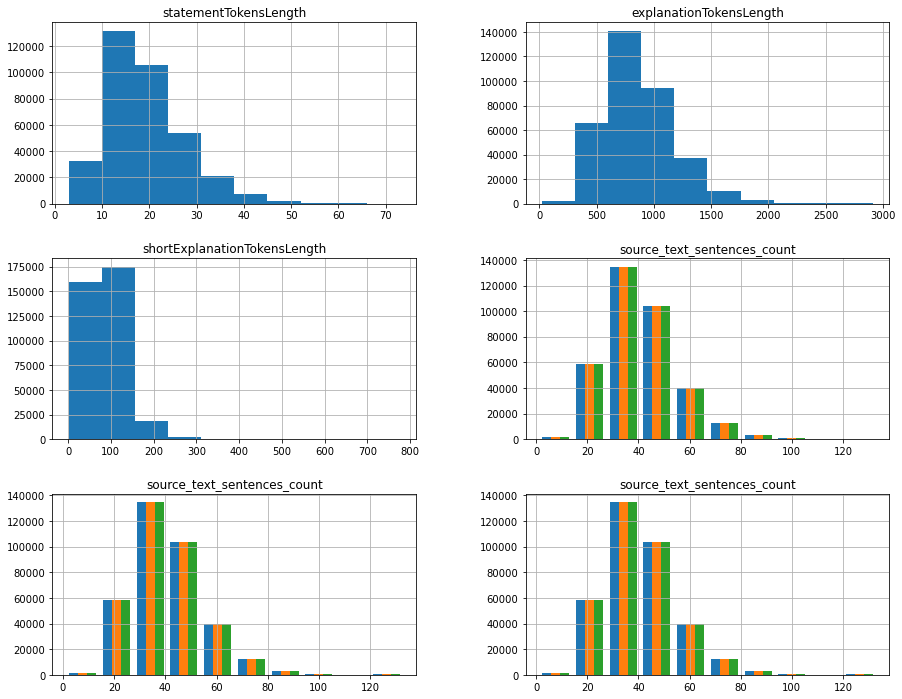

In [17]:
plot = train[['statementTokensLength', 'explanationTokensLength', 'shortExplanationTokensLength',
                 'source_text_sentences_count','source_text_sentences_count','source_text_sentences_count']].hist(figsize=(15, 12))

<AxesSubplot:xlabel='cos_similarity'>

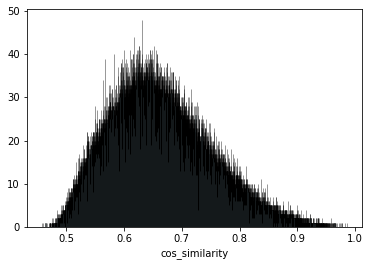

In [18]:
plot_column_distribution(train, "cos_similarity")
#train[['cos_similarity']].describe()

In [19]:
train = get_oracles_A(train, True, top_n)
dev = get_oracles_A(dev, True, top_n)
test = get_oracles_A(test, True, top_n)

Selected 11.610792671253702 % of all sentences
Selected 11.554320544998207 % of all sentences
Selected 11.635617303441743 % of all sentences


<AxesSubplot:xlabel='cos_similarity'>

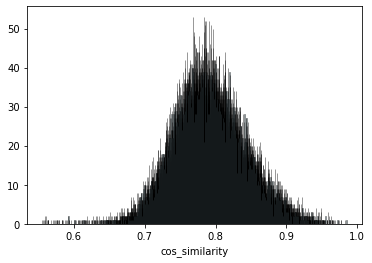

In [20]:
plot_column_distribution(train, "cos_similarity")

In [23]:
triplets, test_df = get_triple_from_df_A(train, 'source_text_sentences_index',
                       "id" , "source_text_sentences")

  0%|          | 0/10312 [00:00<?, ?it/s]

Too few sentences !


0it [00:00, ?it/s]

In [24]:
test_df[test_df.source_text_sentences == test_df.negatives]

Empty DataFrame
Columns: [source_text_sentences_index, id, source_text_sentences, positives, negatives]
Index: []

In [36]:
test_df[0:50]
len(test_df)

41226

In [40]:
# Load pre-trained model - we are using the original Sentence-BERT for this example.
sbert_model = SentenceTransformer(base_model_name, device='cuda:0') # device='cuda:0'

# Initialize triplet loss
loss = TripletLoss(model = sbert_model)

In [41]:
finetune_data = SentencesDataset(examples=triplets, model=sbert_model)
finetune_dataloader = DataLoader(finetune_data, shuffle = True, batch_size = batch_size)

In [43]:
triplets_dev, test_df = get_triple_from_df_A(dev, 'source_text_sentences_index',
                       "id" , "source_text_sentences")
evaluator = TripletEvaluator.from_input_examples(triplets_dev, name = 'dev')

  0%|          | 0/1289 [00:00<?, ?it/s]

0it [00:00, ?it/s]

In [44]:
triplets_test, test_df = get_triple_from_df_A(test, 'source_text_sentences_index',
                       "id" , "source_text_sentences")

  0%|          | 0/1290 [00:00<?, ?it/s]

0it [00:00, ?it/s]

In [45]:
help(sbert_model.fit)

Help on method fit in module sentence_transformers.SentenceTransformer:

fit(train_objectives: Iterable[Tuple[torch.utils.data.dataloader.DataLoader, torch.nn.modules.module.Module]], evaluator: sentence_transformers.evaluation.SentenceEvaluator.SentenceEvaluator = None, epochs: int = 1, steps_per_epoch=None, scheduler: str = 'WarmupLinear', warmup_steps: int = 10000, optimizer_class: Type[torch.optim.optimizer.Optimizer] = <class 'transformers.optimization.AdamW'>, optimizer_params: Dict[str, object] = {'lr': 2e-05}, weight_decay: float = 0.01, evaluation_steps: int = 0, output_path: str = None, save_best_model: bool = True, max_grad_norm: float = 1, use_amp: bool = False, callback: Callable[[float, int, int], NoneType] = None, show_progress_bar: bool = True, checkpoint_path: str = None, checkpoint_save_steps: int = 500, checkpoint_save_total_limit: int = 0) method of sentence_transformers.SentenceTransformer.SentenceTransformer instance
    Train the model with the given training obj

In [47]:
math.ceil(len(finetune_data) * epochs_number / batch_size * 0.01)

52

In [49]:
epochs_number

5

In [51]:
####  Configure the fine-tunning #### 
warmup_steps = math.ceil(len(finetune_data) * epochs_number / batch_size * 0.1) # 5% of train data for warm-up
print("Warmup-steps: {}".format(warmup_steps))

# Fine-tune the model
start = time.time()
gc.collect()
torch.cuda.empty_cache()
sbert_model.fit(train_objectives=[(finetune_dataloader, loss)],
                evaluator = evaluator,
                epochs = epochs_number,
                warmup_steps = warmup_steps,
                output_path = new_model_name,
                checkpoint_path = new_model_name + "/checkpoints/"
               ) #epochs_number
end = time.time()
print("Time for fine-tunning took "+ str((end - start)/60)+" minutes") 

Warmup-steps: 516


Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Iteration:   0%|          | 0/1031 [00:00<?, ?it/s]

Iteration:   0%|          | 0/1031 [00:00<?, ?it/s]

Iteration:   0%|          | 0/1031 [00:00<?, ?it/s]

Iteration:   0%|          | 0/1031 [00:00<?, ?it/s]

Iteration:   0%|          | 0/1031 [00:00<?, ?it/s]

Time for fine-tunning took 30.88272762298584 minutes


In [52]:
params = {'main_distance_function': 0, 'show_progress_bar': True}
test_evaluator = TripletEvaluator.from_input_examples(triplets_test, name = 'test', **params)
test_evaluator(sbert_model, output_path = new_model_name)

Batches:   0%|          | 0/323 [00:00<?, ?it/s]

Batches:   0%|          | 0/323 [00:00<?, ?it/s]

Batches:   0%|          | 0/323 [00:00<?, ?it/s]

0.9373909672417136

In [20]:
params = {'main_distance_function': 0, 'show_progress_bar': True}
test_evaluator = TripletEvaluator.from_input_examples(triplets_test, name = 'test', **params)
test_evaluator(sbert_model, output_path = new_model_name)

Batches:   0%|          | 0/2772 [00:00<?, ?it/s]

Batches:   0%|          | 0/2772 [00:00<?, ?it/s]

Batches:   0%|          | 0/2772 [00:00<?, ?it/s]

0.8430691506157246

In [53]:
#### Visuzlize the performance of training model on STS benchmark train, dev, test dataset ####
train_dev_result = pd.read_csv(new_model_name + '/eval/triplet_evaluation_dev_results.csv').iloc[-2:,:]
test_result = pd.read_csv(new_model_name + '/triplet_evaluation_test_results.csv')

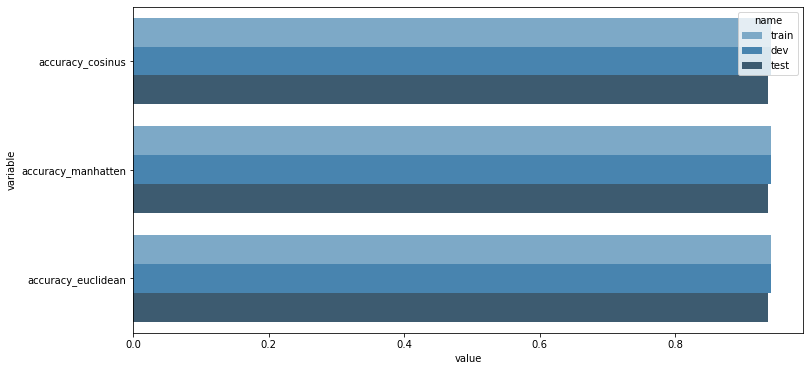

In [54]:
result = pd.concat([train_dev_result, test_result]).iloc[:,2:]
result['name'] = ["train", "dev", "test"]
plot_result = pd.melt(result, id_vars=['name'])

plt.figure(figsize = (12,6))
sns.barplot(x="value", y="variable", hue="name", data=plot_result, palette="Blues_d");